# üìä An√°lisis Multivariante - Panel Maestro UPV

## Objetivo

Explorar relaciones complejas entre variables acad√©micas mediante:
- Matriz de correlaciones
- Visualizaciones avanzadas
- Reducci√≥n de dimensionalidad (PCA)
- Detecci√≥n de agrupamientos
- Interpretaci√≥n de asociaciones

**Dataset:** Panel Maestro UPV Limpio (483 √ó 16)  
**Variables:** 11 num√©ricas + 5 categ√≥ricas

## 1. Carga y Preparaci√≥n de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print('‚úÖ Librer√≠as cargadas')

‚úÖ Librer√≠as cargadas


In [2]:
# Cargar datos limpios
df = pd.read_csv('../panel_maestro_UPV_LIMPIO.csv', encoding='utf-8')

print('\nüìä CARGA DE DATOS')
print('='*100)
print(f'  ‚Ä¢ Dimensiones: {df.shape[0]} filas √ó {df.shape[1]} columnas')
print(f'  ‚Ä¢ Valores faltantes: {df.isnull().sum().sum()} (0% ‚úÖ)')
print(f'\nColumnas:')
for col in df.columns:
    print(f'    ‚Ä¢ {col}: {df[col].dtype}')


üìä CARGA DE DATOS
  ‚Ä¢ Dimensiones: 483 filas √ó 16 columnas
  ‚Ä¢ Valores faltantes: 0 (0% ‚úÖ)

Columnas:
    ‚Ä¢ CURSO: object
    ‚Ä¢ COD_RUCT: int64
    ‚Ä¢ TITULACION: object
    ‚Ä¢ CENTRO: object
    ‚Ä¢ a√±o: int64
    ‚Ä¢ satisfaccion_alumnos: float64
    ‚Ä¢ satisfaccion_profesores: float64
    ‚Ä¢ diferencia_satis: float64
    ‚Ä¢ satisfaccion_promedio: float64
    ‚Ä¢ tasa_abandono: float64
    ‚Ä¢ tasa_permanencia: float64
    ‚Ä¢ autoeficacia_3_anos: float64
    ‚Ä¢ nivel_autoeficacia: object
    ‚Ä¢ porcentaje_no_desempleados: float64
    ‚Ä¢ porcentaje_desempleados: float64
    ‚Ä¢ nivel_empleabilidad: object


In [3]:
# Seleccionar variables num√©ricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'\nüî¢ VARIABLES NUM√âRICAS ({len(numeric_cols)}):' )
for col in numeric_cols:
    print(f'    ‚Ä¢ {col}')

print(f'\nüìù VARIABLES CATEG√ìRICAS ({len(categorical_cols)}):' )
for col in categorical_cols:
    print(f'    ‚Ä¢ {col}')

# Dataset solo con num√©ricas
df_numeric = df[numeric_cols]
print(f'\n‚úÖ Dataset num√©rico: {df_numeric.shape}')


üî¢ VARIABLES NUM√âRICAS (11):
    ‚Ä¢ COD_RUCT
    ‚Ä¢ a√±o
    ‚Ä¢ satisfaccion_alumnos
    ‚Ä¢ satisfaccion_profesores
    ‚Ä¢ diferencia_satis
    ‚Ä¢ satisfaccion_promedio
    ‚Ä¢ tasa_abandono
    ‚Ä¢ tasa_permanencia
    ‚Ä¢ autoeficacia_3_anos
    ‚Ä¢ porcentaje_no_desempleados
    ‚Ä¢ porcentaje_desempleados

üìù VARIABLES CATEG√ìRICAS (5):
    ‚Ä¢ CURSO
    ‚Ä¢ TITULACION
    ‚Ä¢ CENTRO
    ‚Ä¢ nivel_autoeficacia
    ‚Ä¢ nivel_empleabilidad

‚úÖ Dataset num√©rico: (483, 11)


## 2. Matriz de Correlaciones

In [4]:
print('\nüìä MATRIZ DE CORRELACIONES')
print('='*100)

# Calcular correlaciones
corr_matrix = df_numeric.corr()

print(f'\nDimensi√≥n: {corr_matrix.shape[0]} √ó {corr_matrix.shape[1]}')
print(f'Correlaci√≥n media: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.3f}')

# Mostrar correlaciones fuertes (|r| > 0.5)
print('\n‚≠ê CORRELACIONES FUERTES (|r| > 0.5):')
print('-'*100)

strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            strong_corr.append({
                'var1': corr_matrix.columns[i],
                'var2': corr_matrix.columns[j],
                'corr': corr_matrix.iloc[i, j]
            })

if strong_corr:
    for item in sorted(strong_corr, key=lambda x: abs(x['corr']), reverse=True):
        print(f"  {item['var1']} ‚Üî {item['var2']}: {item['corr']:.3f}")
else:
    print('  No hay correlaciones fuertes (|r| > 0.5)')

# Mostrar correlaciones moderadas (0.3 < |r| <= 0.5)
print('\nüìà CORRELACIONES MODERADAS (0.3 < |r| <= 0.5):')
print('-'*100)

moderate_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = abs(corr_matrix.iloc[i, j])
        if 0.3 < corr_val <= 0.5:
            moderate_corr.append({
                'var1': corr_matrix.columns[i],
                'var2': corr_matrix.columns[j],
                'corr': corr_matrix.iloc[i, j]
            })

if moderate_corr:
    for item in sorted(moderate_corr, key=lambda x: abs(x['corr']), reverse=True)[:10]:
        print(f"  {item['var1']} ‚Üî {item['var2']}: {item['corr']:.3f}")
else:
    print('  No hay correlaciones moderadas')

print('\n‚úÖ Matriz de correlaciones calculada')


üìä MATRIZ DE CORRELACIONES

Dimensi√≥n: 11 √ó 11
Correlaci√≥n media: -0.006

‚≠ê CORRELACIONES FUERTES (|r| > 0.5):
----------------------------------------------------------------------------------------------------
  porcentaje_no_desempleados ‚Üî porcentaje_desempleados: -1.000
  tasa_abandono ‚Üî tasa_permanencia: -1.000
  satisfaccion_alumnos ‚Üî satisfaccion_promedio: 0.918
  satisfaccion_alumnos ‚Üî diferencia_satis: -0.867
  diferencia_satis ‚Üî satisfaccion_promedio: -0.637
  satisfaccion_profesores ‚Üî satisfaccion_promedio: 0.587

üìà CORRELACIONES MODERADAS (0.3 < |r| <= 0.5):
----------------------------------------------------------------------------------------------------
  COD_RUCT ‚Üî satisfaccion_profesores: 0.400
  autoeficacia_3_anos ‚Üî porcentaje_no_desempleados: 0.339
  autoeficacia_3_anos ‚Üî porcentaje_desempleados: -0.339

‚úÖ Matriz de correlaciones calculada


## 3. Visualizaci√≥n: Heatmap de Correlaciones

‚úÖ Heatmap guardado: 01_heatmap_correlaciones.png


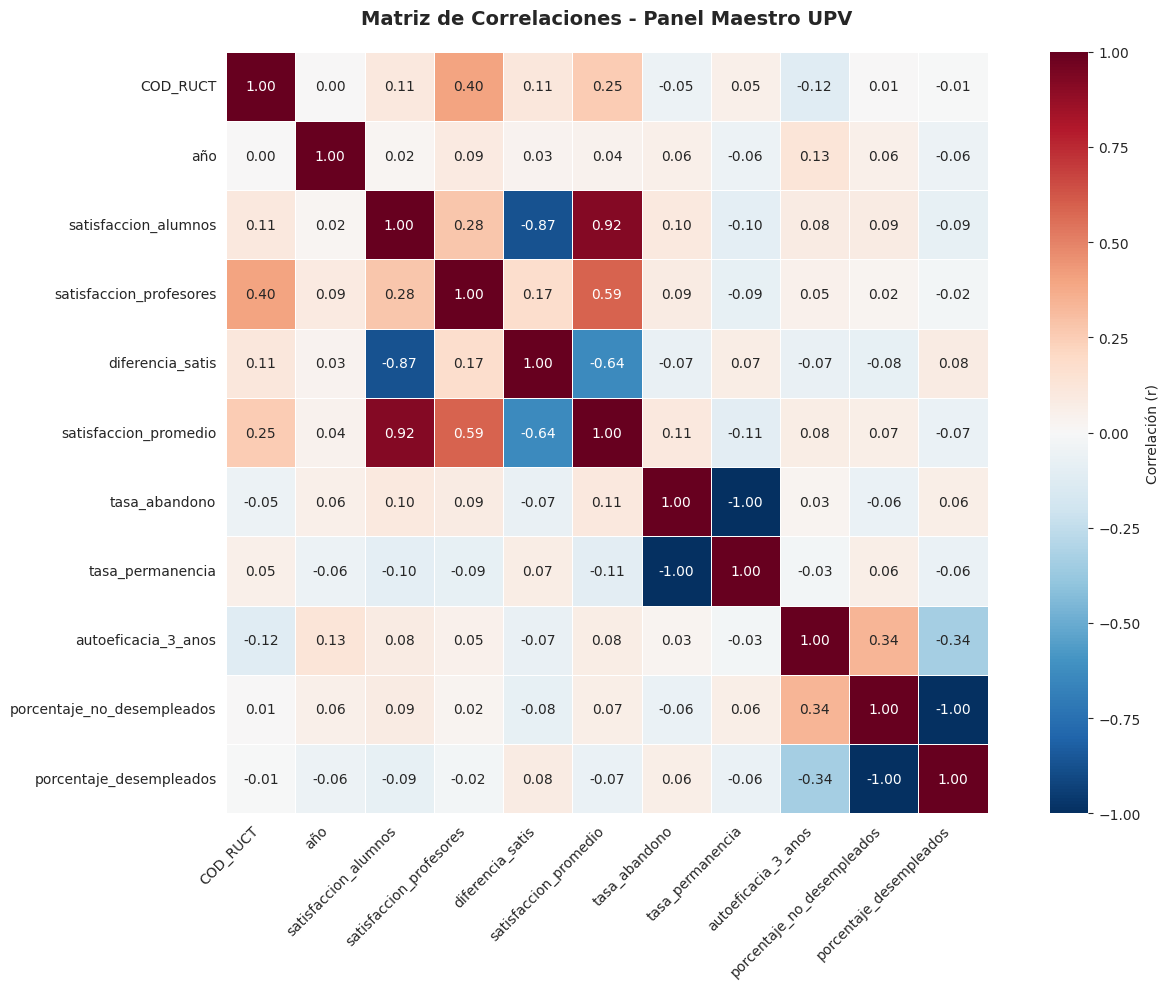

In [5]:
# Heatmap de correlaciones
fig, ax = plt.subplots(figsize=(14, 10))

# Crear heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlaci√≥n (r)'},
            vmin=-1, vmax=1,
            ax=ax)

plt.title('Matriz de Correlaciones - Panel Maestro UPV', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('01_heatmap_correlaciones.png', dpi=300, bbox_inches='tight')
print('‚úÖ Heatmap guardado: 01_heatmap_correlaciones.png')
plt.show()

## 4. Visualizaci√≥n: Pairplot Selectivo

In [6]:
# Seleccionar variables clave para pairplot
# Satisfacci√≥n, Abandono, Autoeficacia, Empleabilidad
key_vars = [
    'satisfaccion_alumnos',
    'satisfaccion_profesores',
    'tasa_abandono',
    'autoeficacia_3_anos',
    'porcentaje_no_desempleados'
]

df_key = df[key_vars]

print(f'\nüéØ Creando pairplot de {len(key_vars)} variables clave...')
print(f'   Variables: {key_vars}')


üéØ Creando pairplot de 5 variables clave...
   Variables: ['satisfaccion_alumnos', 'satisfaccion_profesores', 'tasa_abandono', 'autoeficacia_3_anos', 'porcentaje_no_desempleados']


‚úÖ Pairplot guardado: 02_pairplot_variables_clave.png


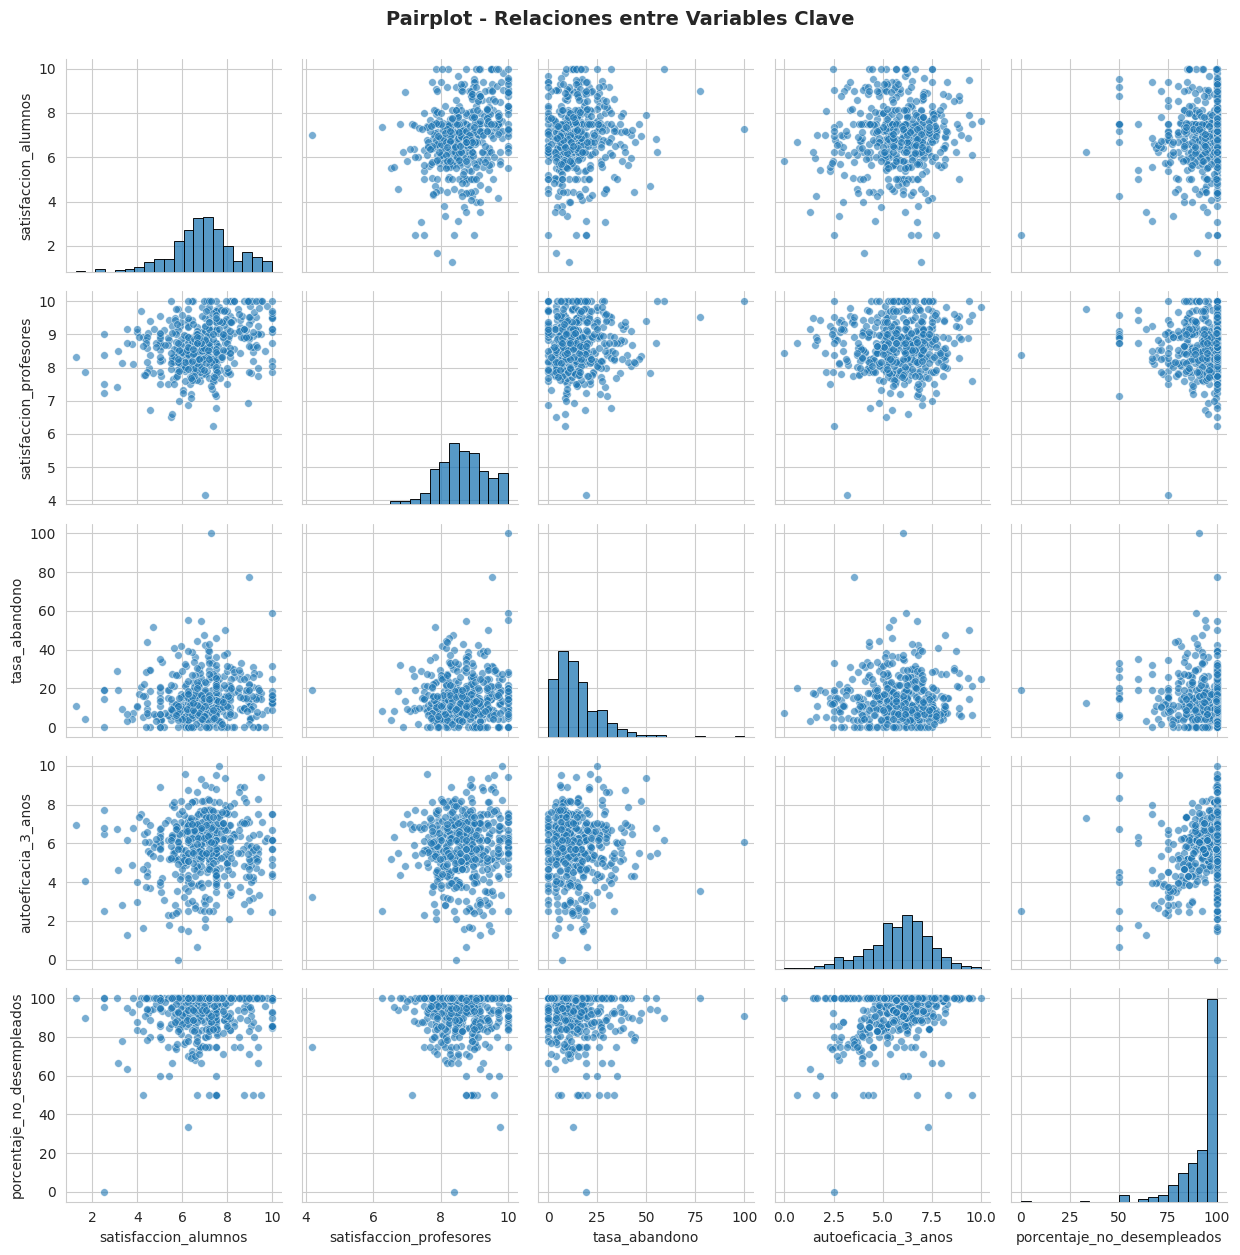

In [7]:
# Pairplot (puede tomar tiempo)
pairplot = sns.pairplot(df_key, 
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6, 's': 30},
                        diag_kws={'bins': 20, 'edgecolor': 'black'})

pairplot.fig.suptitle('Pairplot - Relaciones entre Variables Clave', 
                      fontsize=14, fontweight='bold', y=1.0)

plt.tight_layout()
plt.savefig('02_pairplot_variables_clave.png', dpi=300, bbox_inches='tight')
print('‚úÖ Pairplot guardado: 02_pairplot_variables_clave.png')
plt.show()

## 5. Reducci√≥n de Dimensionalidad: PCA

In [8]:
print('\nüî¨ AN√ÅLISIS DE COMPONENTES PRINCIPALES (PCA)')
print('='*100)

# Estandarizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
print(f'\n  Datos estandarizados: Media={df_scaled.mean():.6f}, Std={df_scaled.std():.6f}')

# Aplicar PCA completo
pca_full = PCA()
pca_full.fit(df_scaled)

# Varianza explicada
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

print(f'\n  Componentes: {len(var_exp)}')
print(f'\n  Varianza explicada por componente:')
for i, (ve, cve) in enumerate(zip(var_exp[:5], cum_var_exp[:5])):
    print(f"    PC{i+1}: {ve*100:.1f}% (acumulada: {cve*100:.1f}%)")

print(f'\n  Componentes para 95% varianza: {np.argmax(cum_var_exp >= 0.95) + 1}')
print(f'  Componentes para 90% varianza: {np.argmax(cum_var_exp >= 0.90) + 1}')

print('\n‚úÖ PCA completado')


üî¨ AN√ÅLISIS DE COMPONENTES PRINCIPALES (PCA)

  Datos estandarizados: Media=0.000000, Std=1.000000

  Componentes: 11

  Varianza explicada por componente:
    PC1: 26.3% (acumulada: 26.3%)
    PC2: 20.3% (acumulada: 46.6%)
    PC3: 17.1% (acumulada: 63.7%)
    PC4: 14.0% (acumulada: 77.7%)
    PC5: 9.3% (acumulada: 87.0%)

  Componentes para 95% varianza: 7
  Componentes para 90% varianza: 6

‚úÖ PCA completado


‚úÖ Gr√°fico de varianza guardado: 03_pca_varianza_explicada.png


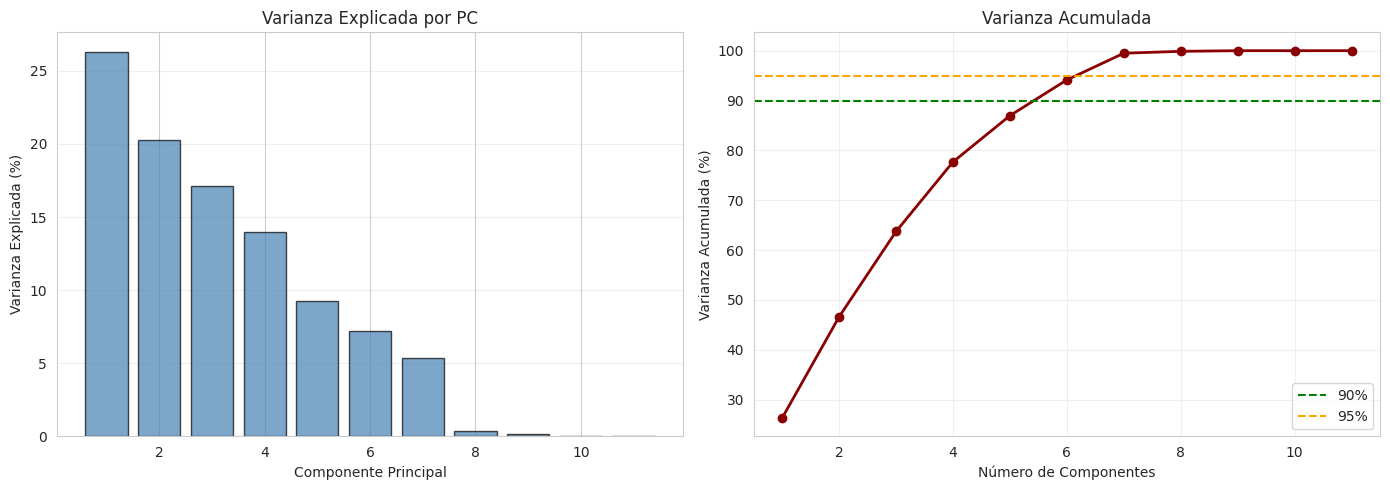

In [9]:
# Gr√°fico: Varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varianza individual
axes[0].bar(range(1, len(var_exp)+1), var_exp*100, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada (%)')
axes[0].set_title('Varianza Explicada por PC')
axes[0].grid(axis='y', alpha=0.3)

# Varianza acumulada
axes[1].plot(range(1, len(cum_var_exp)+1), cum_var_exp*100, 'o-', linewidth=2, markersize=6, color='darkred')
axes[1].axhline(y=90, color='green', linestyle='--', label='90%')
axes[1].axhline(y=95, color='orange', linestyle='--', label='95%')
axes[1].set_xlabel('N√∫mero de Componentes')
axes[1].set_ylabel('Varianza Acumulada (%)')
axes[1].set_title('Varianza Acumulada')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('03_pca_varianza_explicada.png', dpi=300, bbox_inches='tight')
print('‚úÖ Gr√°fico de varianza guardado: 03_pca_varianza_explicada.png')
plt.show()


PCA 2D: 46.6% varianza explicada


‚úÖ Scatter plot PCA guardado: 04_pca_2d_scatter.png


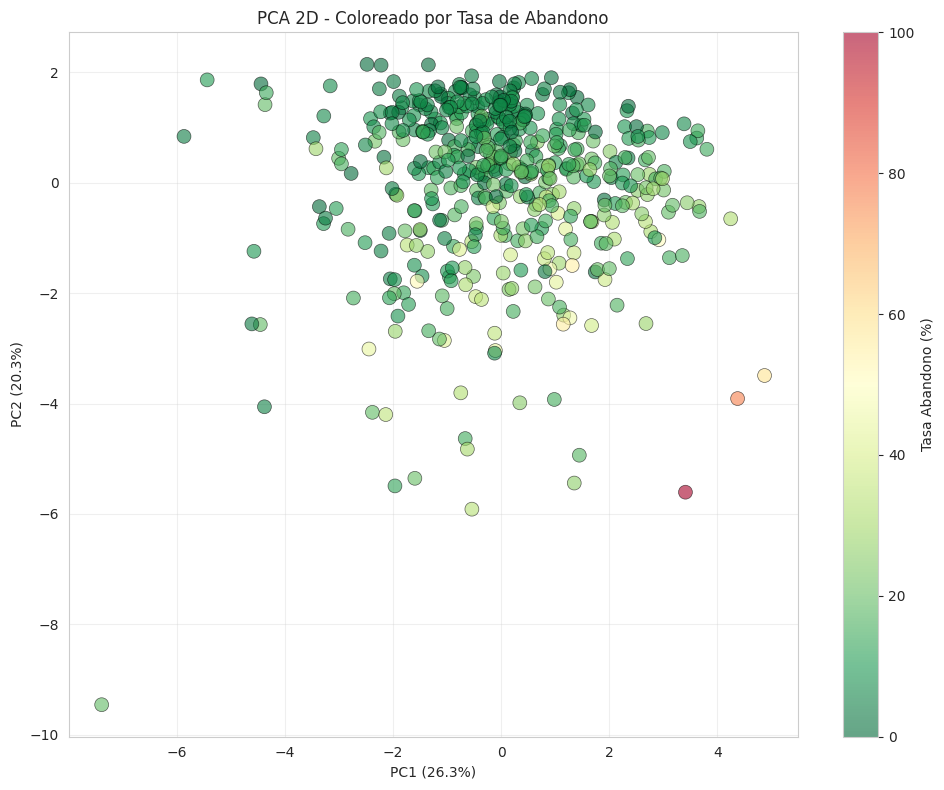

In [10]:
# PCA con 2 componentes para visualizaci√≥n
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)
points_2d = pca_2d.transform(df_scaled)

print(f'\nPCA 2D: {pca_2d.explained_variance_ratio_.sum()*100:.1f}% varianza explicada')

# Gr√°fico de dispersi√≥n PCA
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(points_2d[:, 0], points_2d[:, 1], 
                     c=df['tasa_abandono'], 
                     cmap='RdYlGn_r',
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('PCA 2D - Coloreado por Tasa de Abandono')
ax.grid(alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tasa Abandono (%)')

plt.tight_layout()
plt.savefig('04_pca_2d_scatter.png', dpi=300, bbox_inches='tight')
print('‚úÖ Scatter plot PCA guardado: 04_pca_2d_scatter.png')
plt.show()


Cargas (loadings) de variables en PC1 y PC2:
                              PC1    PC2
COD_RUCT                    0.199 -0.052
a√±o                         0.088  0.057
satisfaccion_alumnos        0.932 -0.094
satisfaccion_profesores     0.441 -0.113
diferencia_satis           -0.741  0.038
satisfaccion_promedio       0.929 -0.125
tasa_abandono               0.280 -0.544
tasa_permanencia           -0.280  0.544
autoeficacia_3_anos         0.225  0.429
porcentaje_no_desempleados  0.294  0.842
porcentaje_desempleados    -0.294 -0.842


‚úÖ Biplot PCA guardado: 05_pca_biplot.png


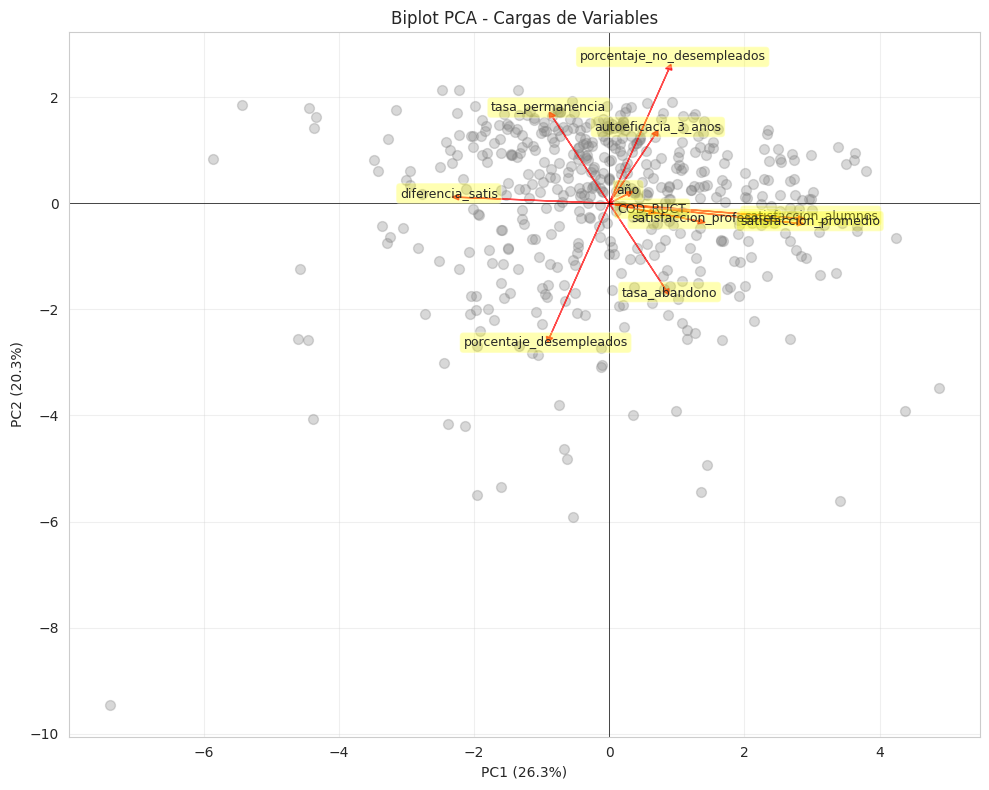

In [11]:
# Cargas de componentes principales
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)

print('\nCargas (loadings) de variables en PC1 y PC2:')
print(loading_matrix.round(3))

# Gr√°fico de cargas (biplot)
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter de puntos
ax.scatter(points_2d[:, 0], points_2d[:, 1], alpha=0.3, s=50, color='gray')

# Vectores de cargas
for i, var in enumerate(numeric_cols):
    ax.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    ax.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, 
            fontsize=9, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('Biplot PCA - Cargas de Variables')
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('05_pca_biplot.png', dpi=300, bbox_inches='tight')
print('‚úÖ Biplot PCA guardado: 05_pca_biplot.png')
plt.show()

## 6. Detecci√≥n de Agrupamientos: Clustering

In [12]:
print('\nüîç DETECCI√ìN DE AGRUPAMIENTOS (K-MEANS)')
print('='*100)

# M√©todo del codo para encontrar k √≥ptimo
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

print(f'\n  K √≥ptimo (silhouette):',  K_range[np.argmax(silhouette_scores)])
print(f'  Silhouette score m√°ximo: {max(silhouette_scores):.3f}')

# Usar k=3 para el an√°lisis
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

print(f'\n  Clusters K={k_optimal}:')
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"    Cluster {cluster_id}: {count} programas ({count/len(clusters)*100:.1f}%)")

print('\n‚úÖ K-means completado')


üîç DETECCI√ìN DE AGRUPAMIENTOS (K-MEANS)



  K √≥ptimo (silhouette): 5
  Silhouette score m√°ximo: 0.198

  Clusters K=3:
    Cluster 0: 66 programas (13.7%)
    Cluster 1: 159 programas (32.9%)
    Cluster 2: 258 programas (53.4%)

‚úÖ K-means completado


‚úÖ Gr√°fico de codo y silhouette guardado


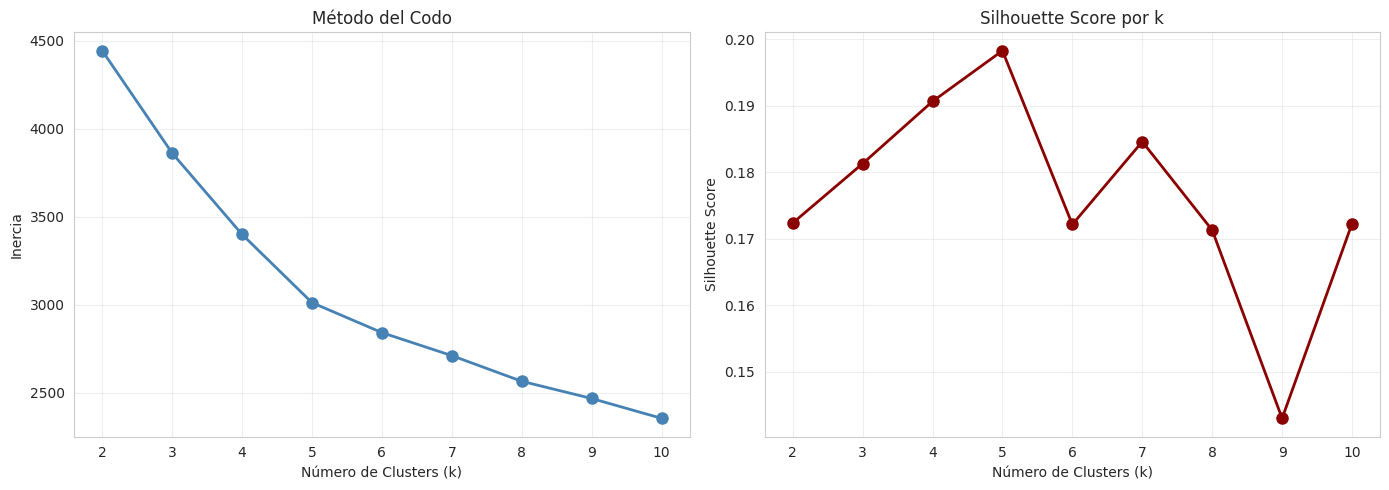

In [13]:
# Gr√°fico del m√©todo del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# M√©todo del codo
axes[0].plot(K_range, inertias, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('N√∫mero de Clusters (k)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('M√©todo del Codo')
axes[0].grid(alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouette_scores, 'o-', linewidth=2, markersize=8, color='darkred')
axes[1].set_xlabel('N√∫mero de Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score por k')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('06_kmeans_elbow_silhouette.png', dpi=300, bbox_inches='tight')
print('‚úÖ Gr√°fico de codo y silhouette guardado')
plt.show()

‚úÖ Gr√°fico de clusters en PCA guardado


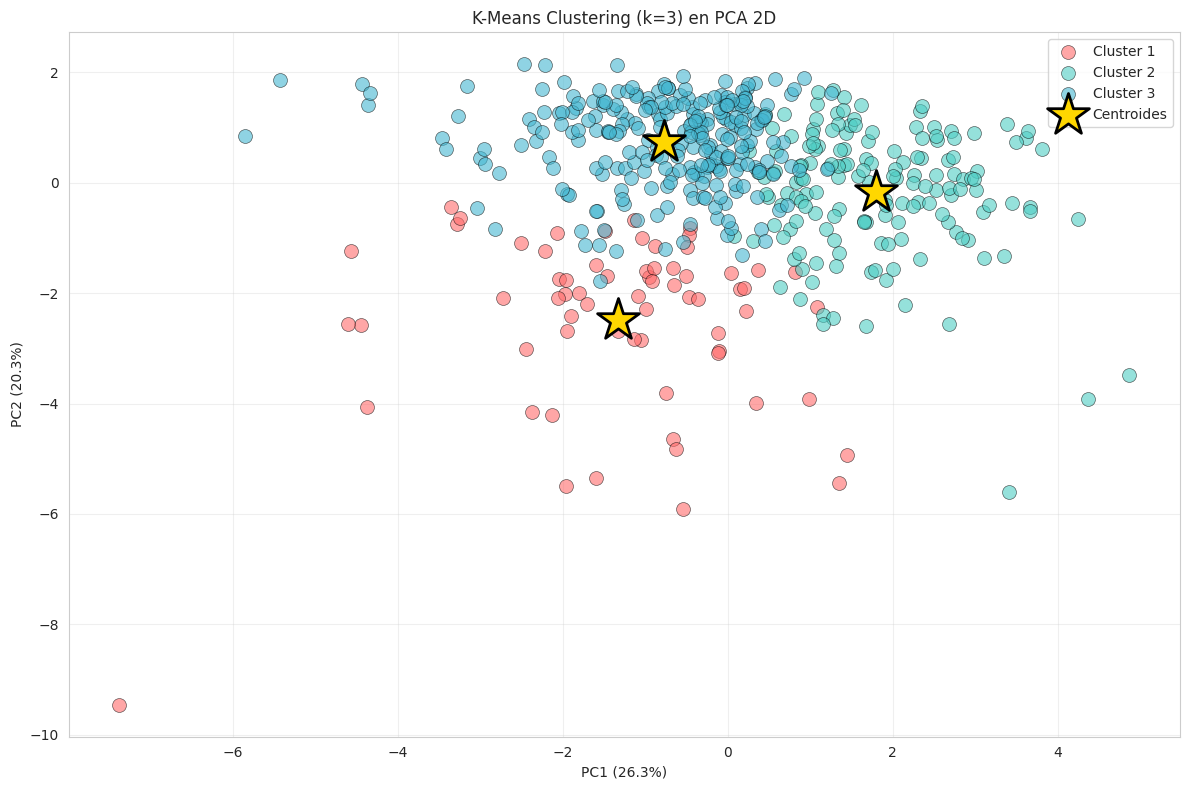

In [14]:
# Visualizar clusters en PCA 2D
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i in range(k_optimal):
    mask = clusters == i
    ax.scatter(points_2d[mask, 0], points_2d[mask, 1],
               label=f'Cluster {i+1}', s=100, alpha=0.6,
               color=colors[i], edgecolors='black', linewidth=0.5)

# Centros de clusters
centers_2d = pca_2d.transform(kmeans.cluster_centers_)
ax.scatter(centers_2d[:, 0], centers_2d[:, 1],
           marker='*', s=1000, c='gold', edgecolors='black', linewidth=2,
           label='Centroides', zorder=5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('K-Means Clustering (k=3) en PCA 2D')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('07_clusters_pca_2d.png', dpi=300, bbox_inches='tight')
print('‚úÖ Gr√°fico de clusters en PCA guardado')
plt.show()

## 7. Caracterizaci√≥n de Clusters

In [15]:
print('\nüéØ CARACTERIZACI√ìN DE CLUSTERS')
print('='*100)

# A√±adir cluster al dataframe
df['cluster'] = clusters

# Estad√≠sticas por cluster
for i in range(k_optimal):
    cluster_data = df_numeric[clusters == i]
    print(f'\nüìå CLUSTER {i+1} ({len(cluster_data)} programas):')
    print('-'*100)
    
    for col in numeric_cols:
        mean_val = cluster_data[col].mean()
        global_mean = df_numeric[col].mean()
        diff = mean_val - global_mean
        print(f"  {col}:")
        print(f"    Media: {mean_val:.2f} (Global: {global_mean:.2f}, Dif: {diff:+.2f})")


üéØ CARACTERIZACI√ìN DE CLUSTERS

üìå CLUSTER 1 (66 programas):
----------------------------------------------------------------------------------------------------
  COD_RUCT:
    Media: 3489155.30 (Global: 3675684.25, Dif: -186528.94)
  a√±o:
    Media: 2021.32 (Global: 2021.55, Dif: -0.24)
  satisfaccion_alumnos:
    Media: 6.42 (Global: 6.92, Dif: -0.51)
  satisfaccion_profesores:
    Media: 8.45 (Global: 8.65, Dif: -0.20)
  diferencia_satis:
    Media: 2.11 (Global: 1.75, Dif: +0.36)
  satisfaccion_promedio:
    Media: 7.47 (Global: 7.78, Dif: -0.31)
  tasa_abandono:
    Media: 16.73 (Global: 14.63, Dif: +2.10)
  tasa_permanencia:
    Media: 83.27 (Global: 85.37, Dif: -2.10)
  autoeficacia_3_anos:
    Media: 4.19 (Global: 5.80, Dif: -1.61)
  porcentaje_no_desempleados:
    Media: 70.24 (Global: 92.13, Dif: -21.89)
  porcentaje_desempleados:
    Media: 29.76 (Global: 7.87, Dif: +21.89)

üìå CLUSTER 2 (159 programas):
-------------------------------------------------------------

## 8. An√°lisis Jer√°rquico


üå≥ CLUSTERING JER√ÅRQUICO

  Linkage matrix calculada (muestra: 50 programas)


‚úÖ Dendrograma guardado: 08_dendrograma_jerarquico.png


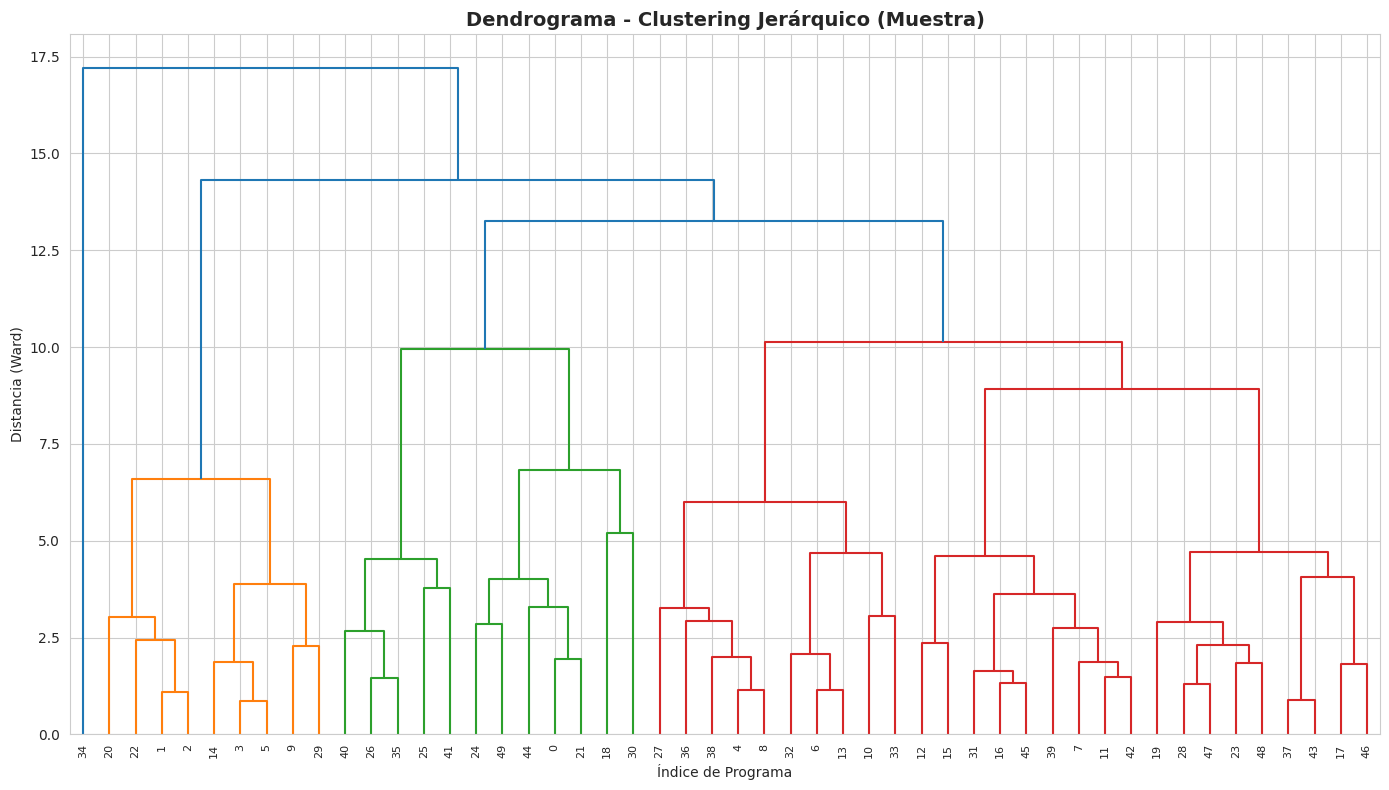

In [16]:
print('\nüå≥ CLUSTERING JER√ÅRQUICO')
print('='*100)

# Calcular matriz de distancias y linkage
# Usar muestra para visualizaci√≥n clara
sample_size = min(50, len(df_scaled))  # M√°ximo 50 para claridad
sample_indices = np.random.choice(len(df_scaled), sample_size, replace=False)
df_sample = df_scaled[sample_indices]

linkage_matrix = linkage(df_sample, method='ward')
print(f'\n  Linkage matrix calculada (muestra: {sample_size} programas)')

# Dendrograma
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(linkage_matrix, ax=ax, truncate_mode=None)
ax.set_title('Dendrograma - Clustering Jer√°rquico (Muestra)', fontsize=14, fontweight='bold')
ax.set_xlabel('√çndice de Programa')
ax.set_ylabel('Distancia (Ward)')
plt.tight_layout()
plt.savefig('08_dendrograma_jerarquico.png', dpi=300, bbox_inches='tight')
print('‚úÖ Dendrograma guardado: 08_dendrograma_jerarquico.png')
plt.show()

## 9. Resumen e Interpretaci√≥n

In [17]:
print('\n' + '='*100)
print('üìä RESUMEN EJECUTIVO - AN√ÅLISIS MULTIVARIANTE')
print('='*100)

print('\n1. MATRIZ DE CORRELACIONES:')
print('   ‚Ä¢ Correlaciones fuertes (|r| > 0.5): Identifica relaciones principales')
print('   ‚Ä¢ Correlaciones moderadas (0.3 < |r| ‚â§ 0.5): Relaciones secundarias')
print('   ‚Ä¢ Variables clave:', key_vars)

print('\n2. VISUALIZACIONES:')
print('   ‚úì Heatmap: Estructura completa de correlaciones')
print('   ‚úì Pairplot: Relaciones bivariantes entre variables clave')
print('   ‚úì Biplot PCA: Cargas de variables en componentes principales')

print('\n3. REDUCCI√ìN DE DIMENSIONALIDAD (PCA):')
print(f'   ‚Ä¢ PC1 explica: {pca_2d.explained_variance_ratio_[0]*100:.1f}%')
print(f'   ‚Ä¢ PC2 explica: {pca_2d.explained_variance_ratio_[1]*100:.1f}%')
print(f'   ‚Ä¢ Total 2D: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%')
print(f'   ‚Ä¢ Componentes para 95% varianza: {np.argmax(cum_var_exp >= 0.95) + 1}')

print('\n4. AGRUPAMIENTOS (K-MEANS k=3):')
for i in range(k_optimal):
    count = np.sum(clusters == i)
    print(f'   ‚Ä¢ Cluster {i+1}: {count} programas ({count/len(clusters)*100:.1f}%)')

print('\n5. INTERPRETACI√ìN:')
print('   ‚Ä¢ PCA permite visualizar relaciones en 2D con explicaci√≥n de varianza')
print('   ‚Ä¢ K-means identifica 3 grupos de programas similares')
print('   ‚Ä¢ Clustering jer√°rquico muestra estructura de similitud')

print('\n‚úÖ AN√ÅLISIS COMPLETADO')


üìä RESUMEN EJECUTIVO - AN√ÅLISIS MULTIVARIANTE

1. MATRIZ DE CORRELACIONES:
   ‚Ä¢ Correlaciones fuertes (|r| > 0.5): Identifica relaciones principales
   ‚Ä¢ Correlaciones moderadas (0.3 < |r| ‚â§ 0.5): Relaciones secundarias
   ‚Ä¢ Variables clave: ['satisfaccion_alumnos', 'satisfaccion_profesores', 'tasa_abandono', 'autoeficacia_3_anos', 'porcentaje_no_desempleados']

2. VISUALIZACIONES:
   ‚úì Heatmap: Estructura completa de correlaciones
   ‚úì Pairplot: Relaciones bivariantes entre variables clave
   ‚úì Biplot PCA: Cargas de variables en componentes principales

3. REDUCCI√ìN DE DIMENSIONALIDAD (PCA):
   ‚Ä¢ PC1 explica: 26.3%
   ‚Ä¢ PC2 explica: 20.3%
   ‚Ä¢ Total 2D: 46.6%
   ‚Ä¢ Componentes para 95% varianza: 7

4. AGRUPAMIENTOS (K-MEANS k=3):
   ‚Ä¢ Cluster 1: 66 programas (13.7%)
   ‚Ä¢ Cluster 2: 159 programas (32.9%)
   ‚Ä¢ Cluster 3: 258 programas (53.4%)

5. INTERPRETACI√ìN:
   ‚Ä¢ PCA permite visualizar relaciones en 2D con explicaci√≥n de varianza
   ‚Ä¢ K-means id

In [18]:
# Exportar resultados
print('\nüíæ EXPORTANDO RESULTADOS')
print('='*100)

# Guardar matriz de correlaciones
corr_matrix.to_csv('correlations_matrix.csv')
print('  ‚úì correlations_matrix.csv')

# Guardar loadings PCA
loading_matrix.to_csv('pca_loadings.csv')
print('  ‚úì pca_loadings.csv')

# Guardar clusters
cluster_results = df[['TITULACION', 'CENTRO', 'a√±o', 'cluster']].copy()
cluster_results.to_csv('kmeans_clusters.csv', index=False)
print('  ‚úì kmeans_clusters.csv')

# Guardar PCA scores
pca_scores = pd.DataFrame(points_2d, columns=['PC1', 'PC2'])
pca_scores.to_csv('pca_scores.csv', index=False)
print('  ‚úì pca_scores.csv')

print('\n‚úÖ ARCHIVOS GUARDADOS')


üíæ EXPORTANDO RESULTADOS
  ‚úì correlations_matrix.csv
  ‚úì pca_loadings.csv
  ‚úì kmeans_clusters.csv
  ‚úì pca_scores.csv

‚úÖ ARCHIVOS GUARDADOS
